<a href="https://colab.research.google.com/github/KSrimanNarayana/firstproject/blob/master/Aerofit_Treadmil_BCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective-
Help AeroFit, to identify the characteristics of the target audience
for each type of treadmill offered by the company

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import copy

In [ ]:
aerofit = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
aerofit.info()
#datatypes and how many non null values are thier in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
aerofit.shape

(180, 9)

The given Dateset contains 180 records data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.

The dataset has the following features:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the
 treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

In [ ]:
#@title Duplicates Detection
#checking for duplicate rows
aerofit.duplicated().value_counts()

False    180
dtype: int64

**Insights**-

No duplicate rows

In [ ]:
#@title Null Value Count in each Column
#checking nulls and no of nulls in dataset
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Insights -**

Zero null values present in Dataset

In [ ]:
#@title Changing the Datatype of Columns
#converting type object dtype to category dtype
#improve memory -Converting such a string variable to a categorical variable will save some memory.
aerofit['Gender'] = aerofit['Gender'].astype('category')
aerofit['MaritalStatus'] = aerofit['MaritalStatus'].astype('category')
aerofit['Usage'] = aerofit['Usage'].astype('category')
aerofit['Product'] = aerofit['Product'].astype('category')
aerofit['Fitness'] = aerofit['Fitness'].astype(str)

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    object  
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(4), object(1)
memory usage: 8.4+ KB


 **Statistics** **Summary**

In [ ]:
aerofit.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


**Insights :**

According to given dataset,

1.**Age** - Customers ages range from **18 to 50 years old**, with an average of 29 years.

2.**Education** - Customers educational levels vary between **12 to 21** years, with an average of 16.

3.**Income** - The annual income of customers falls within the range of **USD 30,000 to USD 100,000,** with an average income of approximately USD 54,000

4.**Miles** - Customers weekly running desired goals vary from **21 to 360 miles**, with an average of **103 miles per week**.


In [ ]:
aerofit.describe(include=["O",'category'])

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,KP281,Male,Partnered,3,3
freq,80,104,107,69,97


**Insights :**

According to given dataset ,

1.**Product** - **KP281** Product Sales Performance is Highest then rest of the products of 44% total sales contribute from this product.

2.**Gender** -  Based on the data of last 3 months, around **58**% of the buyers were **Male** and **42**% were **Female**.

3.**MaritalStatus** - Most of the Sales generated from **Maried** customers around 60% and around 40% of Sales from Singles.

4.**Usage** - Customers are planed to use the product from **2 to 7** **times per week**,with an average usage of 3 times per week.

5.**Fitness** - On an average Customers rated thier fitness level at 3 on a 5-point scale,reflecting a **moderate level of fitness**.

In [ ]:
aerofit['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

we have 3 kinds of Aerofit product treadmills in the given dataset

KP281    
KP481    
KP781

#Creating New Column and Categorizing values in Age,Education,Income and Miles to different classes for better visualization
**Age Column**

Categorizing the values in age column in 4 different buckets:

Young Adult: from 18 - 25

Adults: from 26 - 35

Middle Aged Adults: 36-45

Elder :46 and above

**Education Column**

Categorizing the values in education column in 3 different buckets:

Primary Education: upto 12

Secondary Education: 13 to 15

Higher Education: 16 and above

**Income Column**

Categorizing the values in Income column in 4 different buckets:

Low Income - Upto 40,000

Moderate Income - 40,000 to 60,000

High Income - 60,000 to 80,000

Very High Income - Above 80,000

**Miles column**

Categorizing the values in miles column in 4 different buckets:

Light Activity - Upto 50 miles

Moderate Activity - 51 to 100 miles

Active Lifestyle - 101 to 200 miles

Fitness Enthusiast - Above 200 miles

In [ ]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bins_label1 = ['Young Adults','Adults','Middle Aged Adults','Elder']

aerofit['age_group'] = pd.cut(x=aerofit['Age'],bins = bin_range1,labels =bins_label1)

#binning the Education values into categories
bin_range2 = [0,12,15,float('inf')]
bins_label2 = ['Primary Education','Secondary Education','Higher Education']

aerofit['education_group'] = pd.cut(x=aerofit['Education'],bins = bin_range2,labels = bins_label2)

#binning the Income values into categories
bin_range3 = [0, 40000, 60000, 80000, float('inf')]
bins_label3 = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']

aerofit['income_group'] = pd.cut(x=aerofit['Income'], bins=bin_range3, labels=bins_label3)

#binning the Miles values into categories
bin_range4 =[0,50,100,200,float('inf')]
bins_label4 = ['Light Activity','Moderate Activity','Active Lifestyle','Fitness Enthusiast']

aerofit['miles_group'] = pd.cut(x = aerofit['Miles'],bins = bin_range4,labels= bins_label4)


In [ ]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,education_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


**Univariate Analysis -**

**1. Categorical Variables**

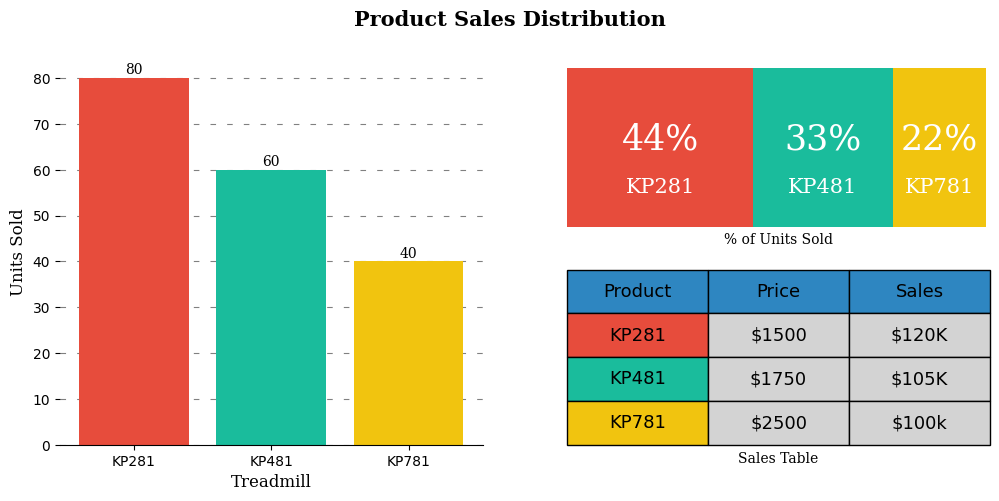

In [ ]:
#@title Product Sales Distribution
#setting the plot
fig = plt.figure(figsize=(12,5))
gs = fig.add_gridspec(nrows=2,ncols=2)

                                        #creating a plot for product column
ax0 = fig.add_subplot(gs[:,0])
product_count = aerofit['Product'].value_counts()
color_map = ["#E74C3C","#1ABC9C","#F1C40F"]

ax0.bar(product_count.index,product_count.values,color = color_map,zorder=2)

#adding text on top of bars
for i in product_count.index:
  ax0.text(i,product_count[i]+1.75,product_count[i],{'font':'serif','size':10},ha='center',va='center')

#adding gridlines to plot
ax0.grid(color = 'grey',linestyle='--',axis='y',dashes =(5,10),zorder=0)

#removing the axes line
for s in ['top','right','left']:
  ax0.spines[s].set_visible(False)

#adding axis label
ax0.set_ylabel('Units Sold',fontfamily='serif',fontsize=12)
ax0.set_xlabel('Treadmill',fontfamily='serif',fontsize=12)


                                          #creating a plot for product % of sales
ax1 = fig.add_subplot(gs[0,1])
product_count['percent'] = ((product_count.values/len(aerofit))*100).round()

ax1.barh(product_count.index[0],width = product_count.loc['percent'][0],color ="#E74C3C")
ax1.barh(product_count.index[0],width = product_count.loc['percent'][1],left=product_count.loc['percent'][0],color = "#1ABC9C")
ax1.barh(product_count.index[0],width = product_count.loc['percent'][2],left=sum(product_count.loc['percent'][:2]),color = "#F1C40F")

ax1.set(xlim=(0,100))

#adding info to each bar

product_count['bar_info'] = [product_count['percent'][0]/2,product_count['percent'][0]+product_count['percent'][1]/2,
                             product_count['percent'][0]+product_count['percent'][1]+product_count['percent'][2]/2]
for i in range(3):
  ax1.text(x=product_count['bar_info'][i],y=0.04,s = f"{product_count['percent'][i]:.0f}%",va='center',ha='center',
           fontfamily = 'serif',fontsize=25,fontweight='light',color='white')
  #labels
  ax1.text(product_count['bar_info'][i],-0.2,s=product_count.index[i],ha='center',va='center',
           fontfamily='serif',fontsize=15,fontweight='light',color='white')

#removing the axis lines
ax1.axis('off')
ax1.set_title('% of Units Sold',fontfamily='serif',fontsize=10,loc='center',y=-0.1)

                                          #creating a plot for product portfolio
ax2 = fig.add_subplot(gs[-1,1])

product_portfolio = [['KP281','$1500','$120K'],['KP481','$1750','$105K'],['KP781','$2500','$100k']]
color_2d = [['#E74C3C', '#D3D3D3', '#D3D3D3'],['#1ABC9C', '#D3D3D3', '#D3D3D3'],
            ['#F1C40F', '#D3D3D3', '#D3D3D3']]

table = ax2.table(cellText = product_portfolio,cellColours=color_2d,cellLoc='center',colLabels=['Product','Price','Sales'],
                  colColours=["#2E86C1"]*3,bbox=[0,0,1,1])
table.set_fontsize(13)
#removing axes
ax2.axis('off')

ax2.set_title('Sales Table',fontfamily='serif',fontsize=10,loc='center',y=-0.15)

#adding tittle to the visual
fig.suptitle('Product Sales Distribution',fontfamily ='serif',fontsize= 15,fontweight='bold')
plt.show()

**Insights -**

*   The KP281 treadmill machine,positioned as entry-level product,has highest number of units sold,trailed by the KP481 (mid-level) and KP781 advanced-level product.
*   All three models have eqaul contributions interms of generating sales revenue.





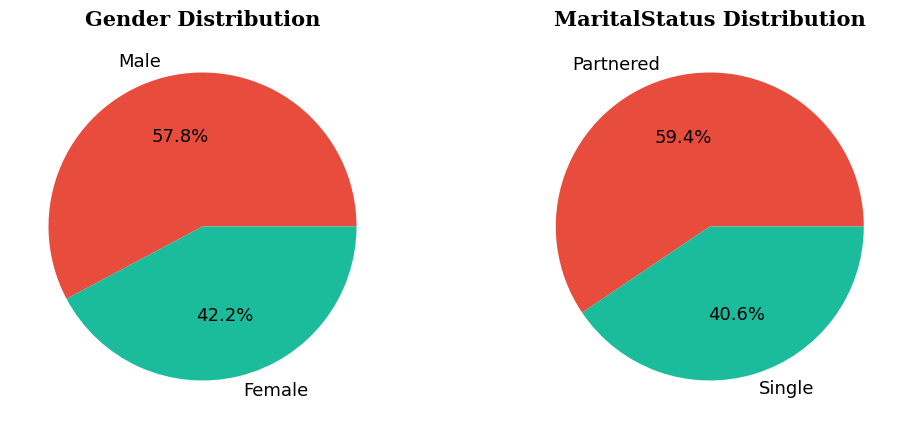

In [ ]:
#@title Gender And Marital Status Distribution

#setting the plot style
fig = plt.figure(figsize=(12,5))
gs = fig.add_gridspec(nrows=1,ncols=2)

                                            #creating a plot for Gender Distribution
ax0 = fig.add_subplot(gs[0,0])
color_map =['#E74C3C','#1ABC9C']
ax0.pie(x=aerofit['Gender'].value_counts().values,labels=aerofit['Gender'].value_counts().index,colors=color_map,
        autopct ='%.01f%%',textprops={'fontsize': 13, 'color': 'black'},wedgeprops = {'linewidth': 5})
ax0.set_title('Gender Distribution',fontdict={'font':'serif','size':15,'weight':'bold'})

                                            #creating a plot for Maritual Status Distribution
ax1 = fig.add_subplot(gs[0,1])
color_map =['#E74C3C','#1ABC9C']
ax1.pie(x=aerofit['MaritalStatus'].value_counts().values,labels=aerofit['MaritalStatus'].value_counts().index,colors=color_map,
        autopct ='%.01f%%',textprops={'fontsize': 13, 'color': 'black'},wedgeprops = {'linewidth': 5})
ax1.set_title('MaritalStatus Distribution',fontdict={'font':'serif','size':15,'weight':'bold'})
plt.show()

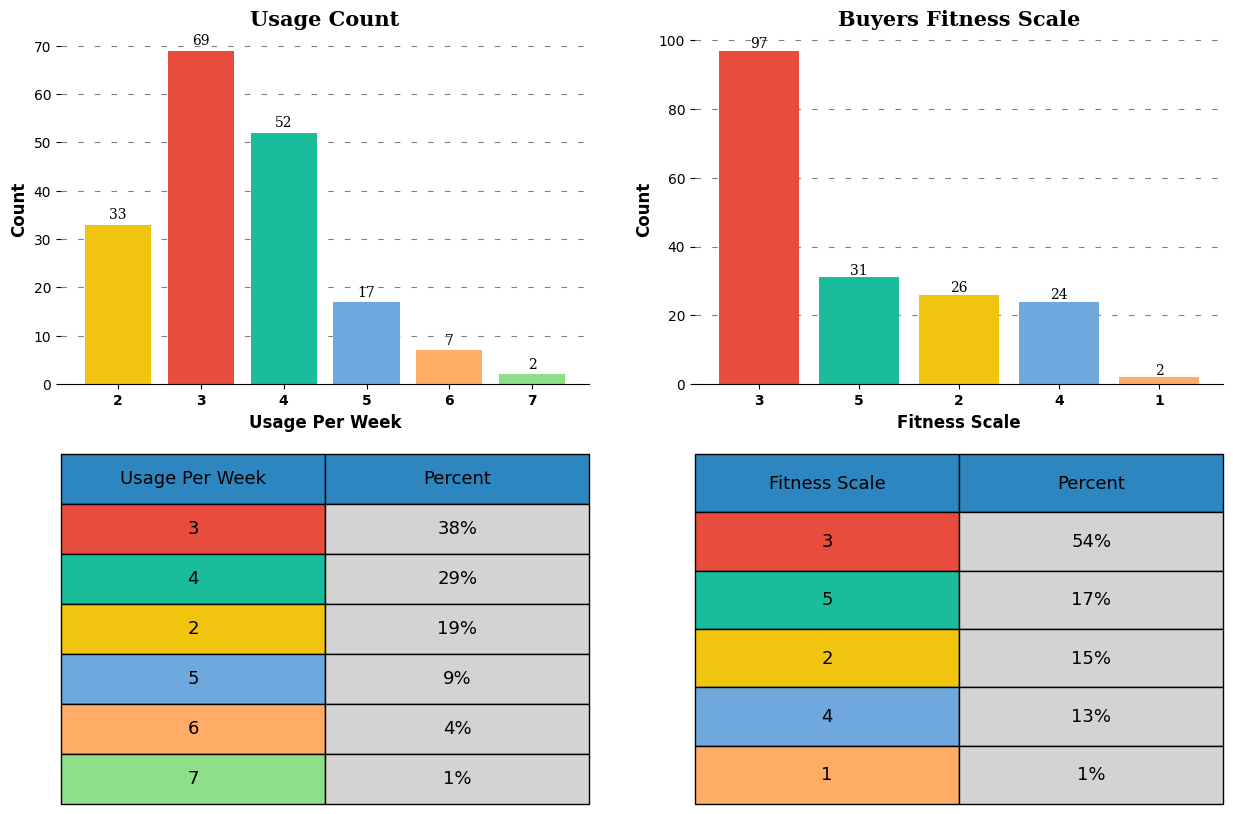

In [ ]:
#@title Buyers Fitness and Treadmill Usage
#setting the plot style
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(nrows=2,ncols=2)

                                            #creating a plot for Buyers Treadmill Usage distribution
ax00 = fig.add_subplot(gs[0,0])
usage = aerofit['Usage'].value_counts()
color_map =["#E74C3C","#1ABC9C","#F1C40F",'#6fa8dc', '#ffad66', '#8fdf8a']
ax00.bar(x=[3, 4, 2, 5, 6, 7],height=[69, 52, 33, 17,  7,  2],color=color_map,zorder = 2)

#adding value count on bars
for i in usage.index:
  ax00.text(x=i,y=usage[i]+2,s=usage[i],fontdict = {'font':'serif','size':10},ha='center',va='center')

#adding grid lines
ax00.grid(color='grey',linestyle='--',axis='y',dashes=(5,10),zorder = 0)

#adding axis label
ax00.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax00.set_xlabel('Usage Per Week',fontweight = 'bold',fontsize = 12)
ax00.set_xticks([3, 4, 2, 5, 6, 7])
ax00.set_xticklabels([3, 4, 2, 5, 6, 7],fontweight = 'bold')

#setting title for visual
ax00.set_title('Usage Count',{'font':'serif', 'size':15,'weight':'bold'})


#removing the axis lines
for s in ['top','left','right']:
  ax00.spines[s].set_visible(False)

                                        #creating a plot for info table for usage
ax10 = fig.add_subplot(gs[1,0])
usage_info =[['3','38%'],['4','29%'],['2','19%'],['5','9%'],['6','4%'],['7','1%']]
color_2d=[["#E74C3C",'#D3D3D3'],["#1ABC9C",'#D3D3D3'],["#F1C40F",'#D3D3D3'],['#6fa8dc','#D3D3D3'], ['#ffad66','#D3D3D3'],['#8fdf8a','#D3D3D3']]
table = ax10.table(cellText = usage_info,cellLoc='center',cellColours = color_2d,bbox=[0,0,1,1],colLabels =['Usage Per Week','Percent'],colColours=["#2E86C1"]*2)
ax10.axis('off')
# ax10.set_title('Treadmill Usage Per Week',y=-0.09,loc='center',fontdict={'font':'serif', 'size':15,'weight':'bold'})
table.set_fontsize(13)

                                        #creating a plot for fitness scale
ax01 = fig.add_subplot(gs[0,1])
fitness = aerofit['Fitness'].value_counts()
color_map =["#E74C3C","#1ABC9C","#F1C40F",'#6fa8dc', '#ffad66', '#8fdf8a']
ax01.bar(x=fitness.index,height=fitness.values,color=color_map,zorder = 2)

#adding value count on bars
for i in fitness.index:
  ax01.text(x=i,y=fitness[i]+2,s=fitness[i],fontdict = {'font':'serif','size':10},ha='center',va='center')

#adding grid lines
ax01.grid(color='grey',linestyle='--',axis='y',dashes=(5,10),zorder = 0)

#adding axis label
ax01.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax01.set_xlabel('Fitness Scale',fontweight = 'bold',fontsize = 12)
ax01.set_xticks(fitness.index)
ax01.set_xticklabels(fitness.index,fontweight = 'bold')

#setting title for visual
ax01.set_title('Buyers Fitness Scale',{'font':'serif', 'size':15,'weight':'bold'})


#removing the axis lines
for s in ['top','left','right']:
  ax01.spines[s].set_visible(False)
                                       #creating a info table for Fitness scale
ax11 = fig.add_subplot(gs[1,1])
fitness_info = [['3','54%'],['5','17%'],['2','15%'],['4','13%'],['1','1%']]
color_2d=[["#E74C3C",'#D3D3D3'],["#1ABC9C",'#D3D3D3'],["#F1C40F",'#D3D3D3'],['#6fa8dc','#D3D3D3'], ['#ffad66','#D3D3D3']]
table = ax11.table(cellText = fitness_info, cellColours=color_2d, cellLoc='center',colLabels =['Fitness Scale','Percent'],
                  colLoc = 'center',colColours=["#2E86C1"]*2,bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax11.axis('off')
plt.show()


**Insights -**


*   Almost 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week.

*   54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.



**2.Numerical Variables**

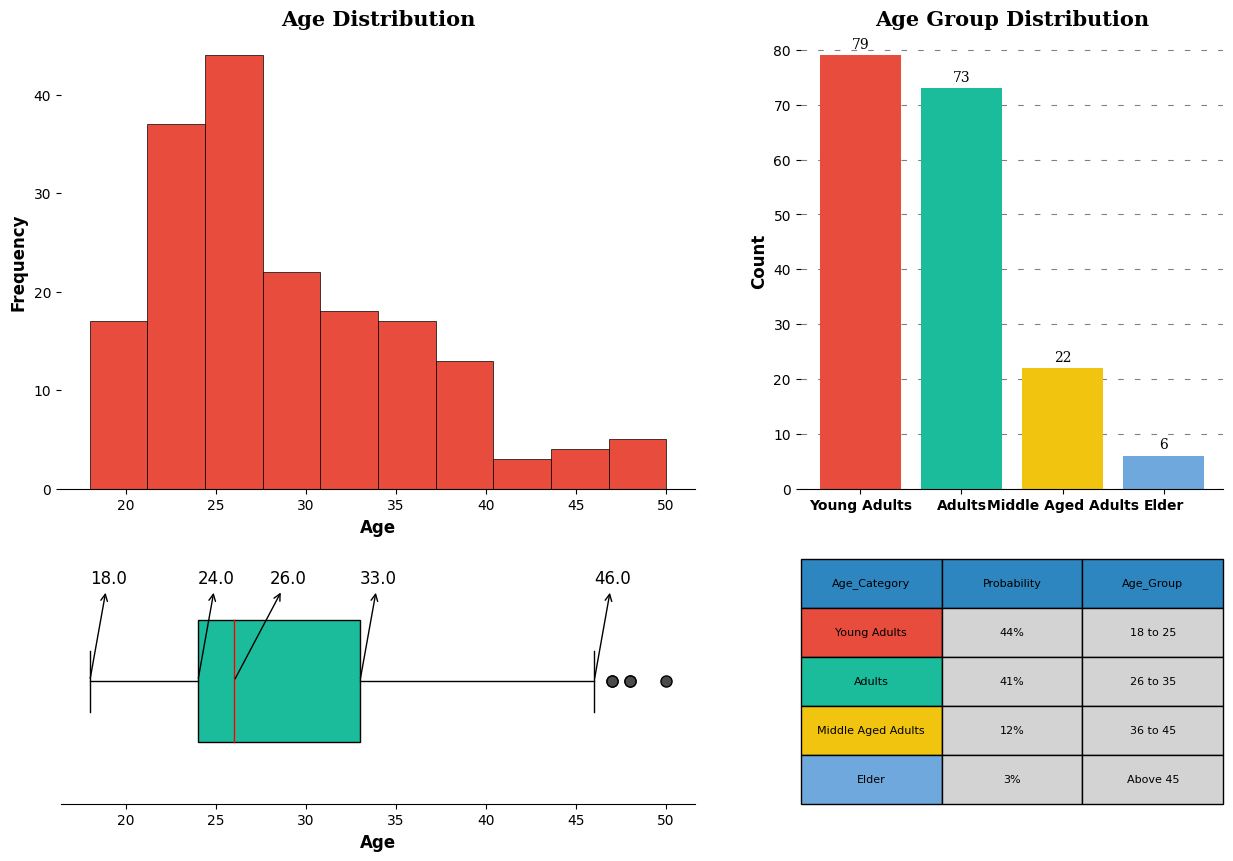

In [ ]:
#@title Customer Age Distribution
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

                                    #creating age histogram

ax0 = fig.add_subplot(gs[0,0])

ax0.hist(aerofit['Age'],color= '#E74C3C',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Age',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#setting title for visual
ax0.set_title('Age Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                     #creating box plot for age

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = aerofit['Age'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor='#1ABC9C')

# Customize median line
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = aerofit['Age'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension

    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#adding the median separately because it was included in info list
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median + 2,1.4),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Age',fontweight = 'bold',fontsize = 12)

                                    #creating age group bar chart

ax2 = fig.add_subplot(gs[0,1])
temp = aerofit['age_group'].value_counts()
color_map = ["#E74C3C","#1ABC9C","#F1C40F",'#6fa8dc']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'grey',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticks(temp.index)
ax2.set_xticklabels(temp.index,fontweight = 'bold')

#setting title for visual
ax2.set_title('Age Group Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        #creating a table for group info

ax3 = fig.add_subplot(gs[1,1])
age_info = [['Young Adults','44%','18 to 25'],['Adults','41%','26 to 35'],['Middle Aged Adults','12%','36 to 45'],
            ['Elder','3%','Above 45']]
color_2d =[['#E74C3C', '#D3D3D3', '#D3D3D3'],['#1ABC9C', '#D3D3D3', '#D3D3D3'],
            ['#F1C40F', '#D3D3D3', '#D3D3D3'],['#6fa8dc', '#D3D3D3', '#D3D3D3']]


table = ax3.table(cellText = age_info, cellColours=color_2d, cellLoc='center',colLabels =['Age_Category','Probability','Age_Group'],colColours=["#2E86C1"]*3,
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax3.axis('off')


plt.show()

**Insights -**


*   85% of the customers fall in the age range of 18 to 35. with a median age of 26, suggesting young people showing more interest in the companies products
*
Outliers - As we can see from the box plot, there are  outlier's present in the age data.



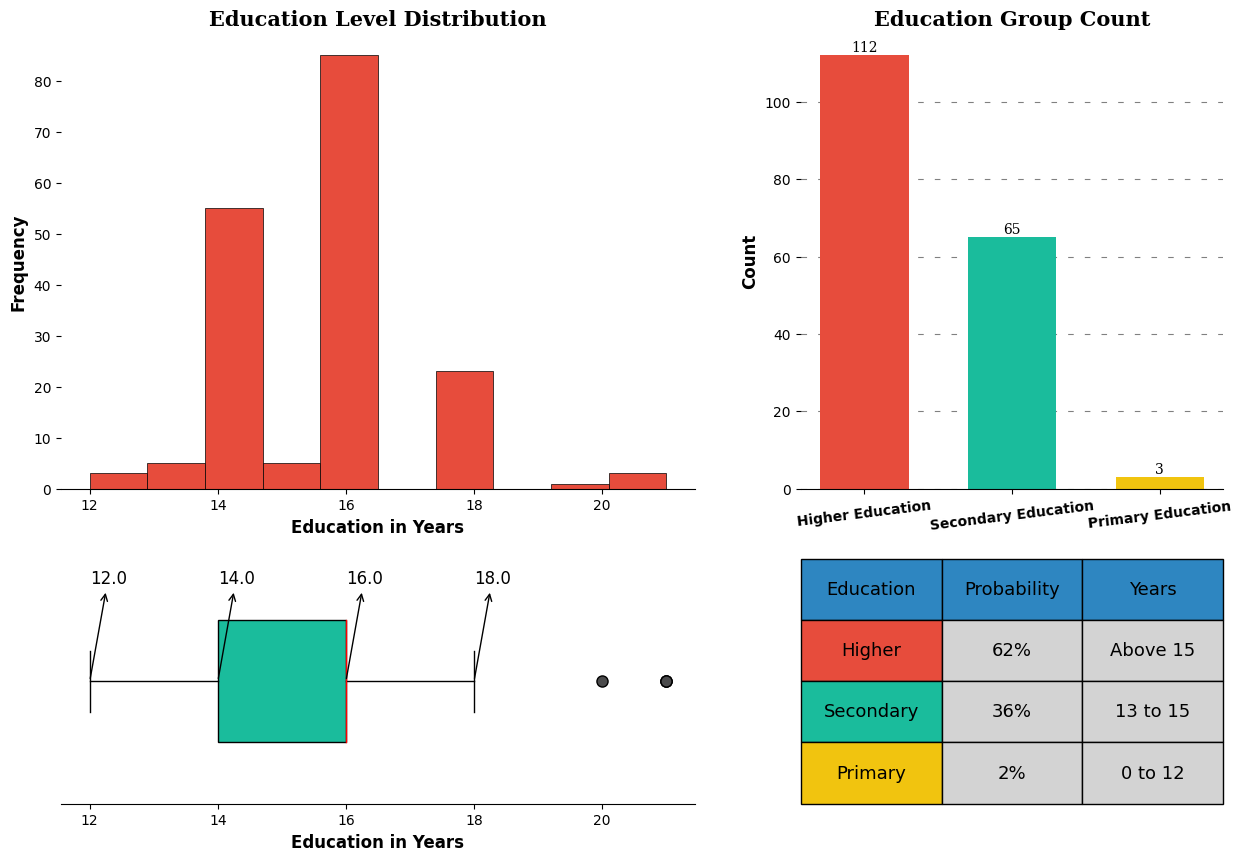

In [ ]:
#@title Customer Education Distribution
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

                                    #creating education histogram

ax0 = fig.add_subplot(gs[0,0])
# ["#E74C3C","#1ABC9C","#F1C40F",'#6fa8dc', '#ffad66', '#8fdf8a']
ax0.hist(aerofit['Education'],color= "#E74C3C",linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Education in Years',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#setting title for visual
ax0.set_title('Education Level Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                     #creating box plot for education

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = aerofit['Education'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor="#1ABC9C")

# Customize median line
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = aerofit['Education'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension

    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))


#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Education in Years',fontweight = 'bold',fontsize = 12)

                                    #creating education group bar chart

ax2 = fig.add_subplot(gs[0,1])
temp = aerofit['education_group'].value_counts()
color_map = ["#E74C3C","#1ABC9C","#F1C40F"]
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2,width = 0.6)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'grey',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticks(temp.index)
ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 7)

#setting title for visual
ax2.set_title('Education Group Count',{'font':'serif', 'size':15,'weight':'bold'})


                                        #creating a table for group info

ax3 = fig.add_subplot(gs[1,1])
edu_info = [['Higher','62%','Above 15'],['Secondary','36%','13 to 15'],['Primary','2%','0 to 12']]
color_2d = [['#E74C3C', '#D3D3D3', '#D3D3D3'],['#1ABC9C', '#D3D3D3', '#D3D3D3'],
            ['#F1C40F', '#D3D3D3', '#D3D3D3']]
table = ax3.table(cellText = edu_info, cellColours=color_2d, cellLoc='center',colLabels =['Education','Probability','Years'],colColours=["#2E86C1"]*3,
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax3.axis('off')


plt.show()

**Insights -**

*   98% of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products. It's plausible that health awareness driven by education could play a pivotal role in this trend.
*   Outliers - As we can see from the box plot, there are 2 outlier's present in the education data.





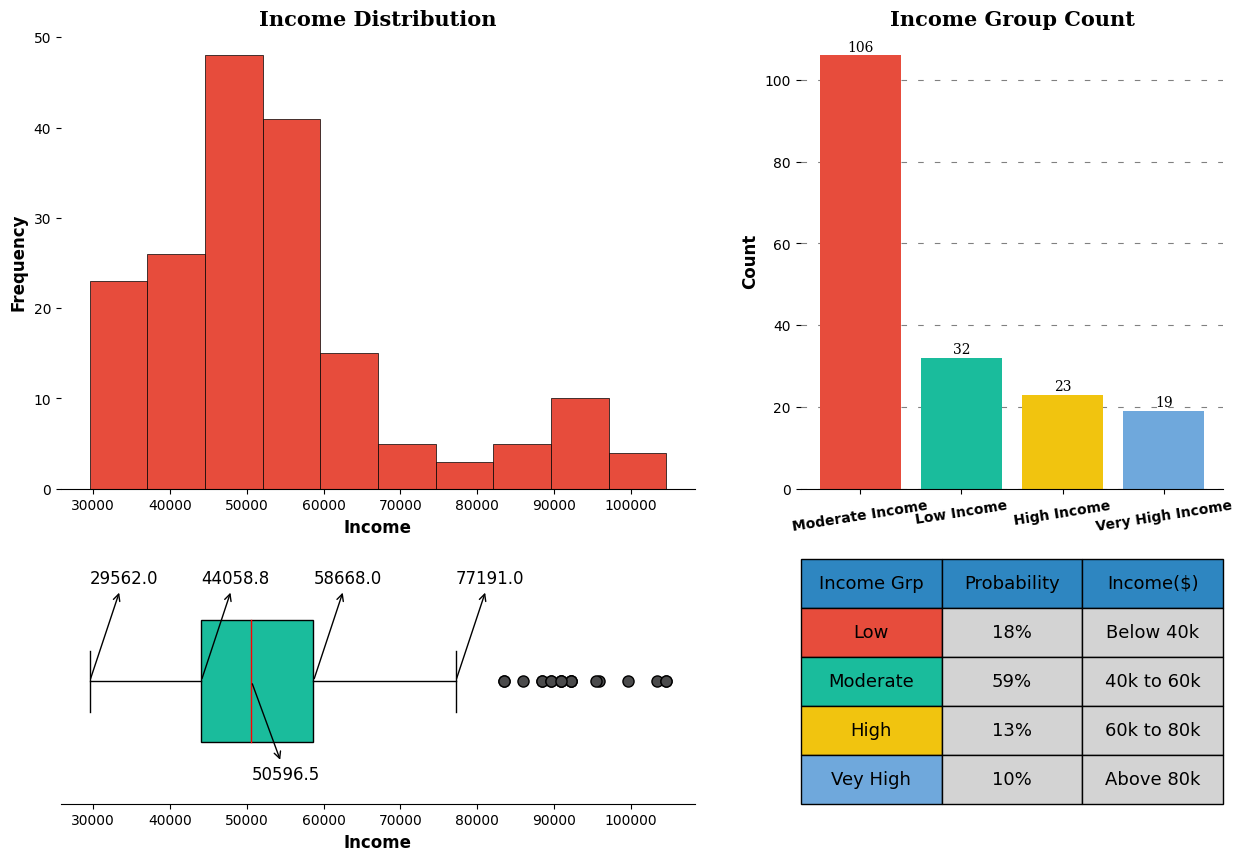

In [ ]:
#@title Customer Income Distribution
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

                                    #creating Income histogram

ax0 = fig.add_subplot(gs[0,0])
# "#E74C3C","#1ABC9C","#F1C40F"
ax0.hist(aerofit['Income'],color= "#E74C3C",linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Income',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#setting title for visual
ax0.set_title('Income Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                     #creating box plot for Income

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = aerofit['Income'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor="#1ABC9C")

# Customize median line
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = aerofit['Income'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension

    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#adding the median separately because it was included in info list
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median,0.6),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Income',fontweight = 'bold',fontsize = 12)

                                    #creating Income group bar chart

ax2 = fig.add_subplot(gs[0,1])
temp = aerofit['income_group'].value_counts()
color_map = ["#E74C3C","#1ABC9C","#F1C40F",'#6fa8dc']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'grey',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticks(temp.index)
ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 9)

#setting title for visual
ax2.set_title('Income Group Count',{'font':'serif', 'size':15,'weight':'bold'})

                                        #creating a table group info

ax3 = fig.add_subplot(gs[1,1])
inc_info = [['Low','18%','Below 40k'],['Moderate','59%','40k to 60k'],['High','13%','60k to 80k'],
            ['Vey High','10%','Above 80k']]
color_2d = [['#E74C3C', '#D3D3D3', '#D3D3D3'],['#1ABC9C', '#D3D3D3', '#D3D3D3'],
            ['#F1C40F', '#D3D3D3', '#D3D3D3'],['#6fa8dc', '#D3D3D3', '#D3D3D3']]

table = ax3.table(cellText = inc_info, cellColours=color_2d, cellLoc='center',
                  colLabels =['Income Grp','Probability','Income($)'],colColours=["#2E86C1"]*3,
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax3.axis('off')
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

plt.show()

 **Insights -**

*   Almost 60% of the customers fall in the income group of (40k to 60k)
dollars suggesting higher inclination of this income group people towards the products.
*  Surprisingly 18% of the customers fall in the income group of (<40K) suggesting almost 77% of the total customers fall in income group of below 60k and only 23% of them falling in 60k and above income group

**Outliers**

As we can see from the box plot, there are many outlier's present in the income data.

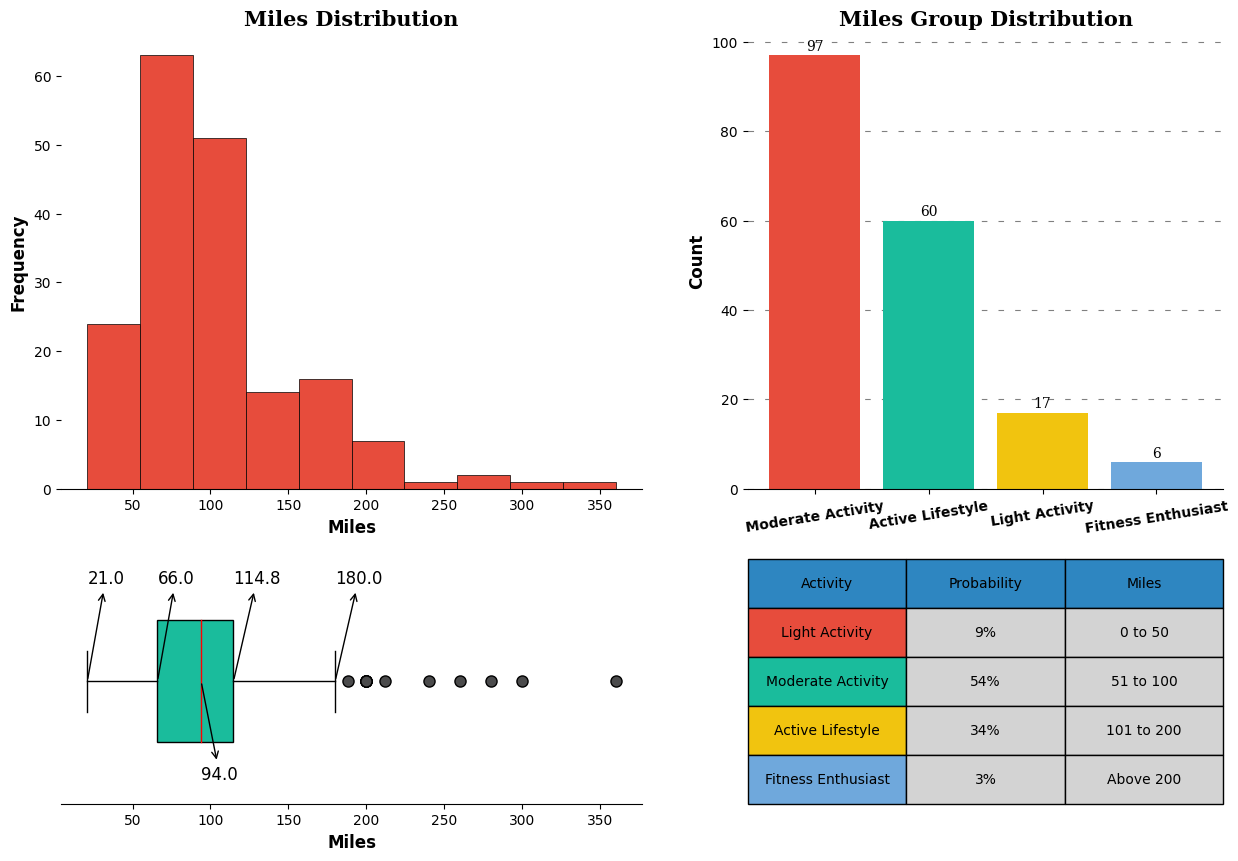

In [ ]:
#@title Customers Expected Weekly Mileage
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.55,0.45])

                                    #creating miles histogram

ax0 = fig.add_subplot(gs[0,0])
# "#E74C3C","#1ABC9C","#F1C40F"
ax0.hist(aerofit['Miles'],color= "#E74C3C",linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Miles',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#setting title for visual
ax0.set_title('Miles Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                     #creating box plot for miles

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = aerofit['Miles'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor="#1ABC9C")

# Customize median line
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = aerofit['Miles'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension

    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#adding the median separately because it was included in info list
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median,0.6),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Miles',fontweight = 'bold',fontsize = 12)


                                    #creating Miles group bar chart

ax2 = fig.add_subplot(gs[0,1])
temp = aerofit['miles_group'].value_counts()
color_map = ["#E74C3C","#1ABC9C","#F1C40F","#6fa8dc"]
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'grey',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticks(temp.index)
ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 9)

#setting title for visual
ax2.set_title('Miles Group Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                        #creating a table for group info

ax3 = fig.add_subplot(gs[1,1])
miles_info = [['Light Activity','9%','0 to 50'],['Moderate Activity','54%','51 to 100'],['Active Lifestyle','34%','101 to 200'],
            ['Fitness Enthusiast','3%','Above 200']]
color_2d = [['#E74C3C', '#D3D3D3', '#D3D3D3'],['#1ABC9C', '#D3D3D3', '#D3D3D3'],
            ['#F1C40F', '#D3D3D3', '#D3D3D3'],['#6fa8dc', '#D3D3D3', '#D3D3D3']]

table = ax3.table(cellText = miles_info, cellColours=color_2d, cellLoc='center',colLabels =['Activity','Probability','Miles'],colColours=["#2E86C1"]*3,
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(11)

#removing axis
ax3.axis('off')


plt.show()

 **Insights -**

* Almost 88% of the customers plans to use the treadmill for 50 to 200 miles per week with a median of 94 miles per week.
* Outliers - As we can see from the box plot, there are outlier's present in the miles data.





**Bivariate Analysis**

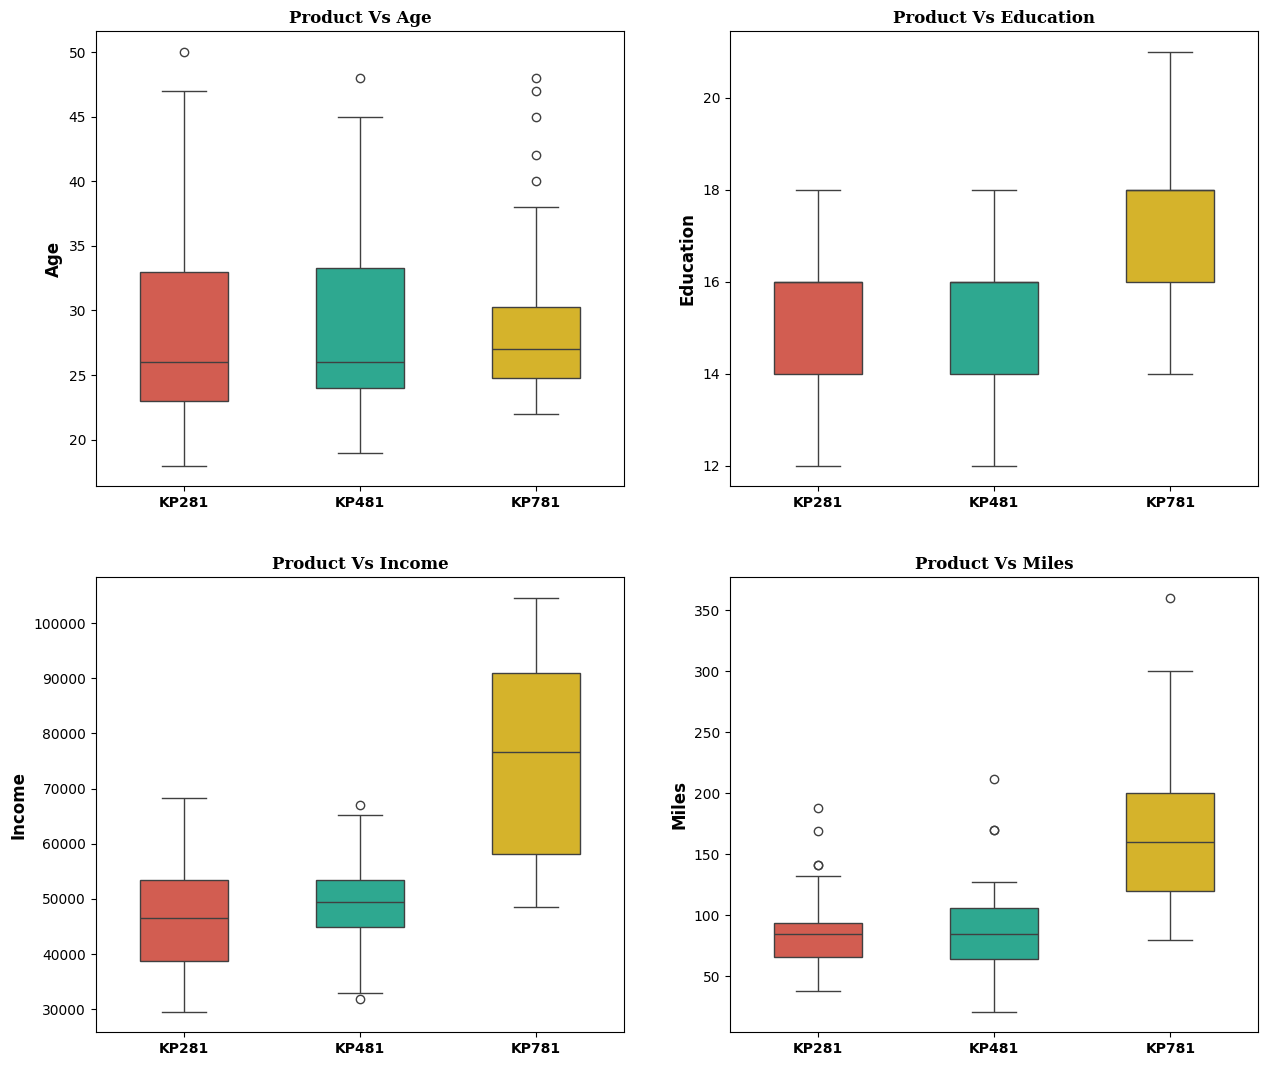

In [ ]:
#@title Analysis on Product VS Customers  Characteristics
#setting the plot style
df = aerofit
fig = plt.figure(figsize = (15,13))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:

    #plot position
    ax0 = fig.add_subplot(gs[i,j])

    #plot
    sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5, palette =["#E74C3C","#1ABC9C","#F1C40F"])

    #plot title
    ax0.set_title(f'Product Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df['Product'].unique(),fontweight = 'bold')
    ax0.set_ylabel(f'{k}',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')

plt.show()


**Insights -**


* The analysis presented above clearly indicates a strong preference for the treadmill model KP781 among customers who possess **higher education, higher income levels, and intend to engage in running activities exceeding 150 miles per week**.




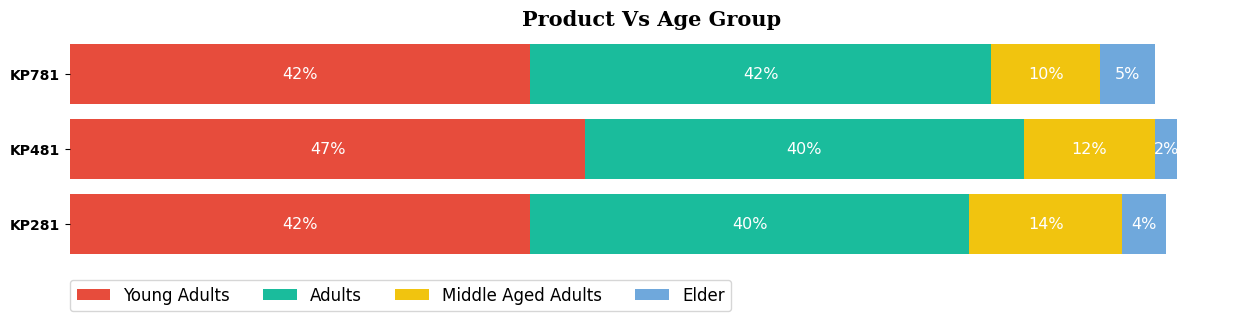

In [ ]:
#@title Product Prefernce Across Customer Age Groups
fig,ax0 = plt.subplots(figsize = (15,3))
df = aerofit
                                #Product Vs AgeGroups
agdf = aerofit.groupby('Product')['age_group'].value_counts(normalize=True).round(2).to_frame().rename(columns={'age_group':'Probability'}).reset_index()
agdf = agdf.pivot(columns=['age_group'],index='Product',values='Probability')


#for left parameter in ax.barh
temp = np.zeros(len(agdf),dtype = float)
color_map = ["#E74C3C","#1ABC9C","#F1C40F","#6fa8dc"]

#plotting the visual
for i,j in zip(agdf.columns,color_map):
    ax0.barh(agdf.index,width = agdf[i],left = temp, label = i,color = j)
    temp += agdf[i].values

#inserting text
temp = np.zeros(len(agdf),dtype = float)

for i in agdf.columns:
    for j,k in enumerate(agdf[i]):
        if k == 0:
            continue
        ax0.text(k/2 + temp[j],agdf.index[j],f"{k:.0%}",va = 'center', ha='center',fontsize=11.5, color='white')
    temp += agdf[i].values

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax0.spines[s].set_visible(False)

#customizing ticks
ax0.set_xticks([])
ax0.set_yticklabels(agdf.index,fontweight = 'bold')

#plot title
ax0.set_title('Product Vs Age Group',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
ax0.legend(loc = (0,-0.2),ncol = 4,fontsize = 12)

plt.show()

**Insights -**

*   The analysis provided above distinctly demonstrates that there exists no strong correlation between age groups and product preferences.
*   This is evident from the nearly uniform distribution of age groups across all the products.

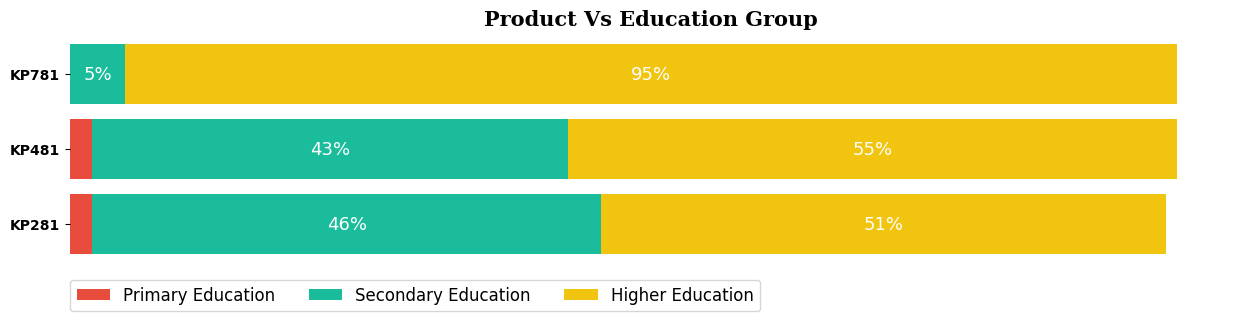

In [ ]:
#@title Product Preferences Across Education Levels
#setting the plot style
fig,ax0 = plt.subplots(figsize = (15,3))

                                                    #product vs education group
val = 'education_group'

#creating required df
df_grp = aerofit.groupby('Product')[val].value_counts(normalize = True).round(2).to_frame().rename(columns={'education_group':'Probability'}).reset_index()
df_grp = df_grp.pivot(columns=['education_group'],index='Product',values='Probability')


#for left parameter in ax.barh
temp = np.zeros(len(df_grp),dtype = float)
color_map =["#E74C3C","#1ABC9C","#F1C40F"]

#plotting the visual
for i,j in zip(df_grp.columns,color_map):
    ax0.barh(df_grp.index,width = df_grp[i],left = temp, label = i,color = j)
    temp += df_grp[i].values

#inserting text
temp = np.zeros(len(df_grp),dtype = float)

for i in df_grp.columns:
    for j,k in enumerate(df_grp[i]):
        if k <0.05:
            continue
        ax0.text((k/2 + temp[j]),df_grp.index[j],f"{k:.0%}",va = 'center', ha='center',fontsize=13, color='white')
    temp += df_grp[i].values

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax0.spines[s].set_visible(False)

#customizing ticks
ax0.set_xticks([])
ax0.set_yticklabels(df_grp.index,fontweight = 'bold')

#plot title
ax0.set_title('Product Vs Education Group',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
ax0.legend(loc = (0,-0.2),ncol = 4,fontsize = 12)

plt.show()

**Insights -**

* The analysis provided above cleary demonstrates the preference of Highly Educated people for treadmill model KP781.
*  For treadmill models KP481 and KP281, the distribution of customer with Secondary Education and with Higher Education is almost equal.




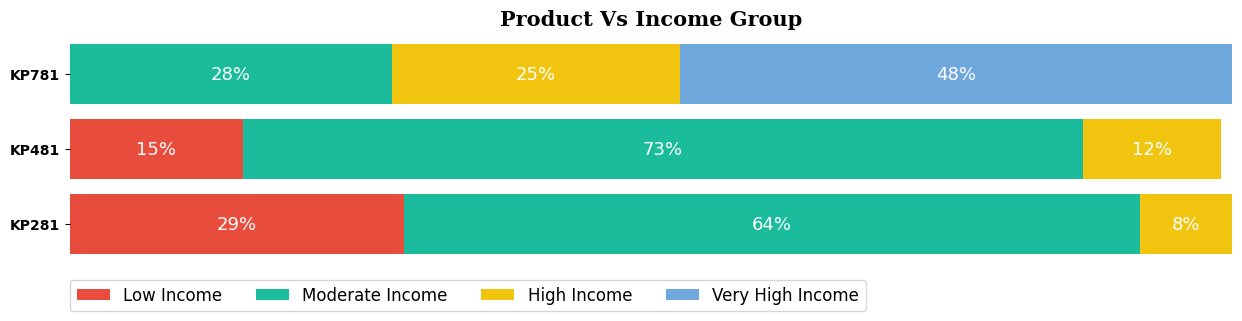

In [ ]:
#@title Product Preference Across Income Group
#setting the plot style
fig,ax0 = plt.subplots(figsize = (15,3))

                                                    #product vs income group
val = 'income_group'
#creating required df
df_grp = aerofit.groupby('Product')[val].value_counts(normalize = True).round(2).to_frame().rename(columns={'income_group':'Probability'}).reset_index()
df_grp = df_grp.pivot(columns=['income_group'],index='Product',values='Probability')


#for left parameter in ax.barh
temp = np.zeros(len(df_grp),dtype = float)
color_map = ["#E74C3C","#1ABC9C","#F1C40F","#6fa8dc"]

#plotting the visual
for i,j in zip(df_grp.columns,color_map):
    ax0.barh(df_grp.index,width = df_grp[i],left = temp, label = i,color = j)
    temp += df_grp[i].values

#inserting text
temp = np.zeros(len(df_grp),dtype = float)

for i in df_grp.columns:
    for j,k in enumerate(df_grp[i]):
        if k < 0.05:
            continue
        ax0.text(k/2 + temp[j],df_grp.index[j],f"{k:.0%}",va = 'center', ha='center',fontsize=13, color='white')
    temp += df_grp[i].values

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax0.spines[s].set_visible(False)

#customizing ticks
ax0.set_xticks([])
ax0.set_yticklabels(df_grp.index,fontweight = 'bold')

#plot title
ax0.set_title('Product Vs Income Group',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
ax0.legend(loc = (0,-0.2),ncol = 4,fontsize = 12)

plt.show()

**Insights -**

*  
Treadmill model KP781 is preferred more by customers with Very High Income group.
* Both treadmill models, KP481 and KP281, are preferred more by customers with Moderate Income group.

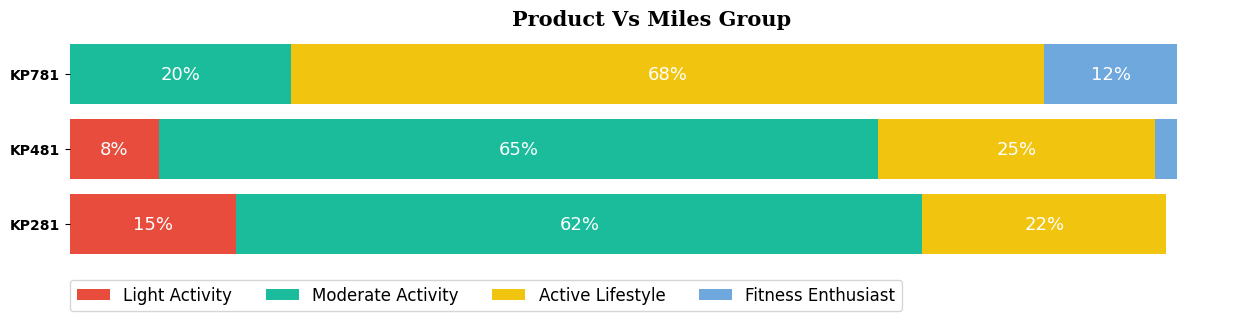

In [ ]:
#@title Product Preference across Customer Weekly Mileage
#setting the plot style
fig,ax0 = plt.subplots(figsize = (15,3))

                                                    #product vs miles group
val = 'miles_group'
#creating required df
df_grp = aerofit.groupby('Product')[val].value_counts(normalize = True).round(2).to_frame().rename(columns={'miles_group':'Probability'}).reset_index()
df_grp = df_grp.pivot(columns=['miles_group'],index='Product',values='Probability')


#for left parameter in ax.barh
temp = np.zeros(len(df_grp),dtype = float)
color_map = ["#E74C3C","#1ABC9C","#F1C40F","#6fa8dc"]

#plotting the visual
for i,j in zip(df_grp.columns,color_map):
    ax0.barh(df_grp.index,width = df_grp[i],left = temp, label = i,color = j)
    temp += df_grp[i].values

#inserting text
temp = np.zeros(len(df_grp),dtype = float)

for i in df_grp.columns:
    for j,k in enumerate(df_grp[i]):
        if k < 0.05:
            continue
        ax0.text(k/2 + temp[j],df_grp.index[j],f"{k:.0%}",va = 'center', ha='center',fontsize=13, color='white')
    temp += df_grp[i].values

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax0.spines[s].set_visible(False)

#customizing ticks
ax0.set_xticks([])
ax0.set_yticklabels(df_grp.index,fontweight = 'bold')

#plot title
ax0.set_title('Product Vs Miles Group',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
ax0.legend(loc = (0,-0.2),ncol = 4,fontsize = 12)

plt.show()

**Insights -**

*  Treadmill model KP781 is preferred more by customers planning to run (Active Lifestyle)100 to 200 miles per week.
*   Both treadmill models, KP481 and KP281, are preferred more by customers planning to run (Moderate Activity)50 to 100 miles per week.






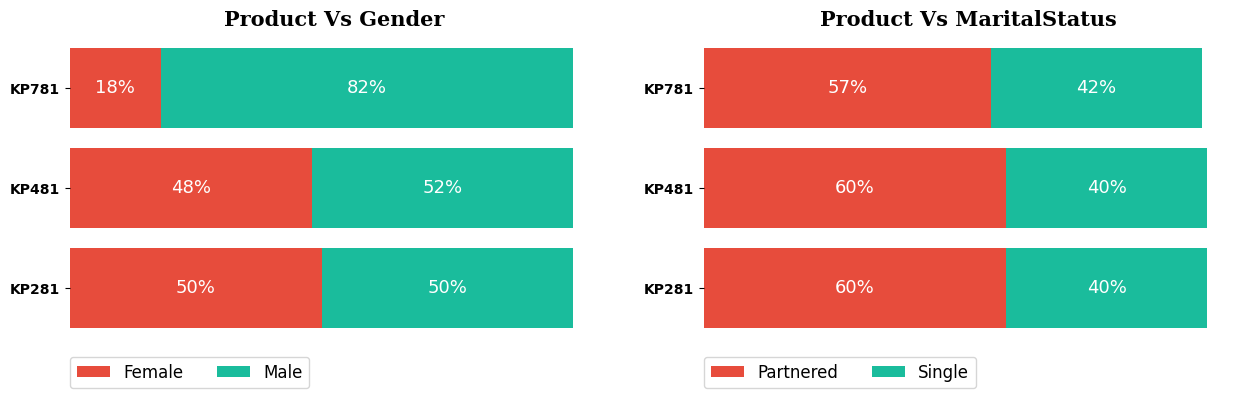

In [ ]:
#@title Product Preference across Gender and Marital Status
#setting the plot style
fig = plt.figure(figsize = (15,4))
gs = fig.add_gridspec(1,2)

for r,c,val in [(0,0,'Gender'),(0,1,'MaritalStatus')]:

    ax0 = fig.add_subplot(gs[r,c])

    #creating required df
    df_grp = aerofit.groupby('Product')[val].value_counts(normalize = True).round(2)
    df_grp.name = 'count'
    df_grp = df_grp.reset_index()
    df_grp = df_grp.pivot(columns = val,index = 'Product',values = 'count')

    #for left parameter in ax.barh
    temp = np.zeros(len(df_grp),dtype = float)
    color_map =  ["#E74C3C","#1ABC9C"]

    #plotting the visual
    for i,j in zip(df_grp.columns,color_map):
        ax0.barh(df_grp.index,width = df_grp[i],left = temp, label = i,color = j)
        temp += df_grp[i].values

    #inserting text
    temp = np.zeros(len(df_grp),dtype = float)

    for i in df_grp.columns:
        for j,k in enumerate(df_grp[i]):
            if k < 0.05:
                continue
            ax0.text(k/2 + temp[j],df_grp.index[j],f"{k:.0%}",va = 'center', ha='center',fontsize=13, color='white')
        temp += df_grp[i].values

    #removing the axis lines
    for s in ['top','left','right','bottom']:
        ax0.spines[s].set_visible(False)

    #customizing ticks
    ax0.set_xticks([])
    ax0.set_yticklabels(df_grp.index,fontweight = 'bold')

    #plot title
    ax0.set_title(f'Product Vs {val}',{'font':'serif', 'size':15,'weight':'bold'})

    #adding legend
    ax0.legend(loc = (0,-0.15),ncol = 2,fontsize = 12)

plt.show()

**Insights -**

1. **Gender**

* Treadmill model KP781 is preferred more by male customers.
Both treadmill models, KP481 and KP281, show equal distribution of both the gender.
2. **Marital Status**

* For all the three treadmill models, there is uniform distribution of Married and Single Customers.
*customers whose Marital Status is Partnered, showing slighly higher preference.

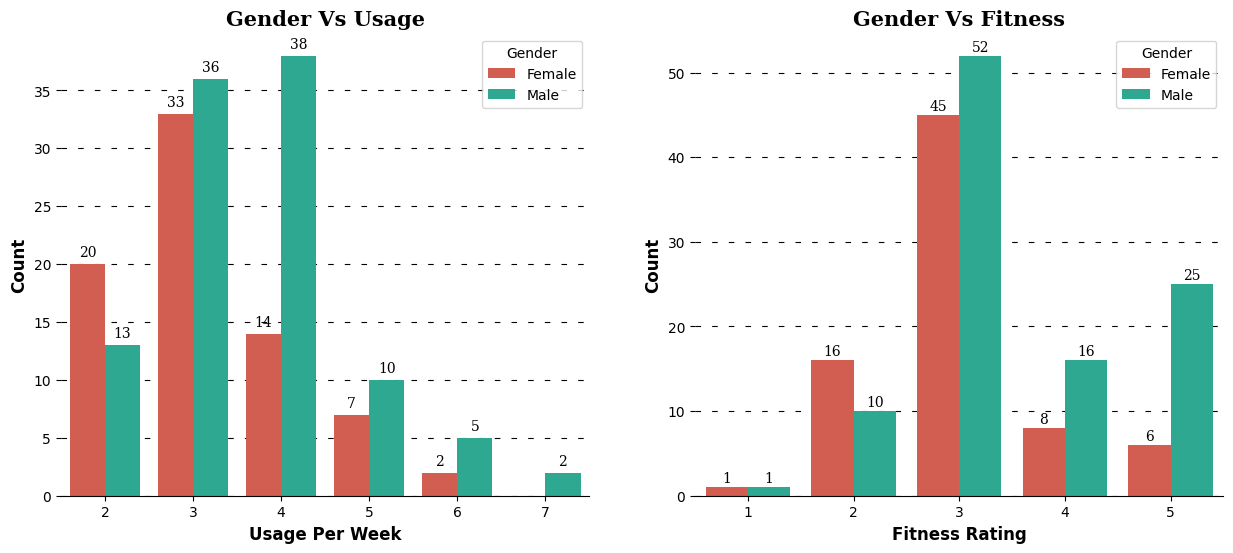

In [ ]:
#@title  Gender vs Product Usage And Gender Vs Fitness
#setting the plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)

                                        # Usage Vs Gender

#creating bar plot
ax1 = fig.add_subplot(gs[0,0])

plot = sns.countplot(data = df, x = 'Usage', hue = 'Gender',order = sorted(df['Usage'].unique()),
              ax = ax1,palette = ["#E74C3C","#1ABC9C"],zorder = 2)

#adding the value_counts
t=0
for i in plot.patches:
   if t>10:
    continue
   else:
    ax1.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
    t+=1

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_xlabel('Usage Per Week',fontweight = 'bold',fontsize = 12)
ax1.set_ylabel('Count',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Gender Vs Usage',{'font':'serif', 'size':15,'weight':'bold'})


                                      # Fitness Vs Gender

#creating bar plot
ax2 = fig.add_subplot(gs[0,1])

plot = sns.countplot(data = df, x = 'Fitness', hue = 'Gender',order = sorted(df['Fitness'].unique()),
              ax = ax2,palette = ["#E74C3C","#1ABC9C"],zorder = 2)

#adding the value_counts
t=0
for i in plot.patches:
    if t>9:
      continue
    else:
      ax2.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
      t+=1
#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#customizing axis labels
ax2.set_xlabel('Fitness Rating',fontweight = 'bold',fontsize = 12)
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax2.set_title('Gender Vs Fitness',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

 **Insights -**
1. **Gender Vs Usage**

Almost 70% of Female customers plan to use the treadmill for 2 to 3 times a week whereas almost 70% of Male customer plan to use the treadmill for 3 to 4 times a week
2. **Gender Vs Fitness**

Almost 80% of Female customers rated themselves between 2 to 3 whereas almost 90% of Male customer rated themselves between 3 to 5 on the fitness scale

**Correlation between Variables**

 **Pairplot**

In [ ]:
df_copy = copy.deepcopy(aerofit)

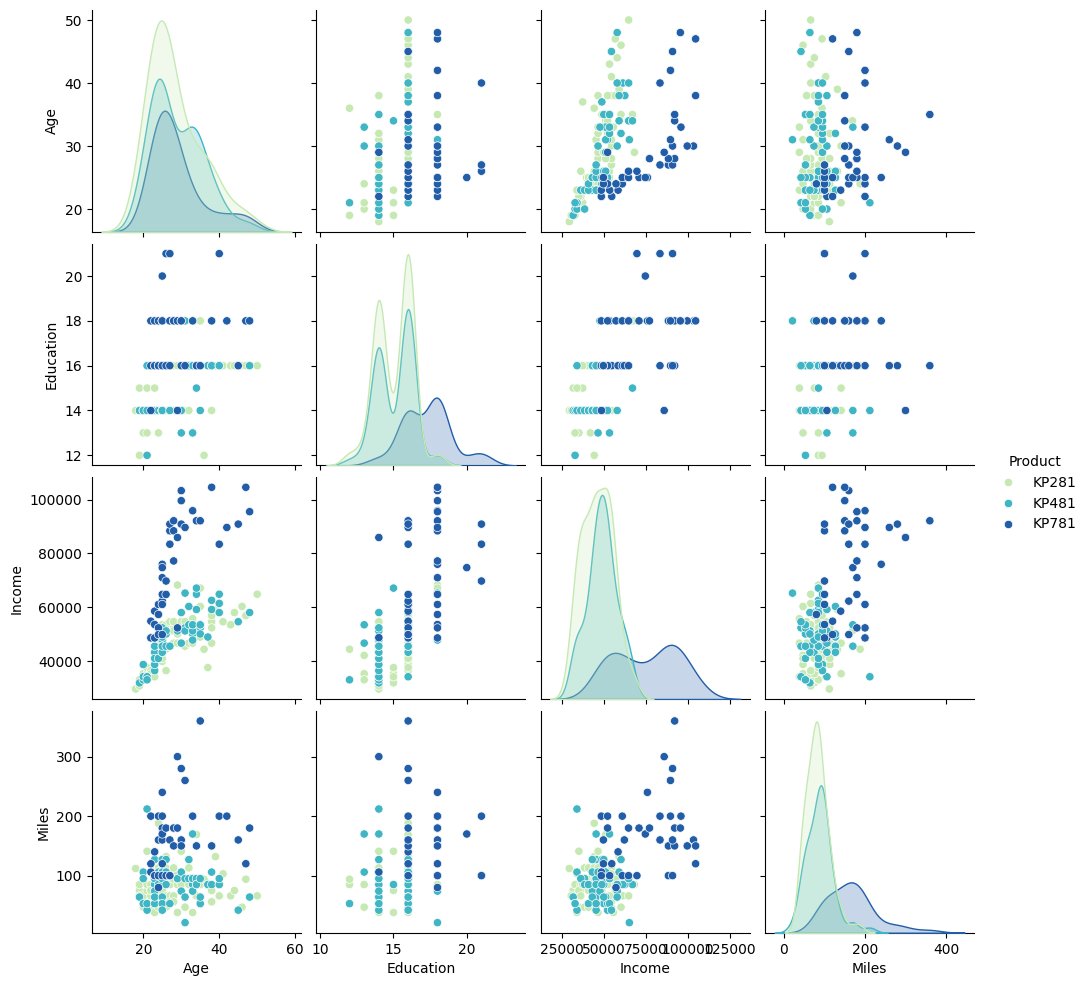

In [ ]:
sns.pairplot(df_copy, hue ='Product', palette= 'YlGnBu')
plt.show()

 **Heatmap**

In [ ]:
# First we need to convert object into int datatype for usage and fitness columns

df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    category
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    category
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    category
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   age_group        180 non-null    category
 10  education_group  180 non-null    category
 11  income_group     180 non-null    category
 12  miles_group      180 non-null    category
dtypes: category(7), int64(6)
memory usage: 10.9 KB


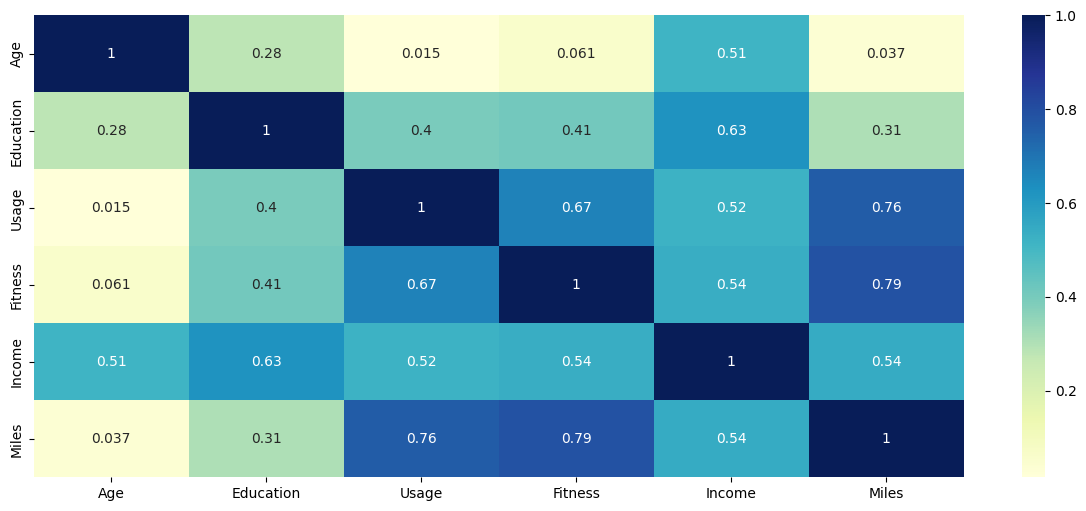

In [ ]:
corr_mat = df_copy.corr()

plt.figure(figsize=(15,6))

sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")

plt.show()

From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them
Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.
Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

**Computing Probability - Marginal, Conditional Probability**

In [ ]:
#@title Probability of product purchase w.r.t. gender
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


 **Insights**
The Probability of a treadmill being purchased by a female is 42%.

The conditional probability of purchasing the treadmill model given that the customer is female is

For Treadmill model KP281 - 22%

For Treadmill model KP481 - 16%

For Treadmill model KP781 - 4%

The Probability of a treadmill being purchased by a male is 58%.

The conditional probability of purchasing the treadmill model given that the customer is male is -

For Treadmill model KP281 - 22%

For Treadmill model KP481 - 17%

For Treadmill model KP781 - 18%

In [ ]:
#@title Probability of product purchase w.r.t. Age
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


**Insights**
The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

For Treadmill model KP281 - 19%

For Treadmill model KP481 - 16%

For Treadmill model KP781 - 9%

The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

The conditional probability of purchasing the treadmill model given that the customer is Adult is -

For Treadmill model KP281 - 18%

For Treadmill model KP481 - 13%

For Treadmill model KP781 - 9%

The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.
The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

In [ ]:
#@title Probability of product purchase w.r.t. Education level
pd.crosstab(index =df['Product'],columns = df['education_group'],margins = True,normalize = True ).round(2)

education_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


**Insights**
The Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62%.

The conditional probability of purchasing the treadmill model given that the customer has Higher Education is

For Treadmill model KP281 - 23%

For Treadmill model KP481 - 18%

For Treadmill model KP781 - 21%

The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36%.

The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -

For Treadmill model KP281 - 21%

For Treadmill model KP481 - 14%

For Treadmill model KP781 - 1%

The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%.

In [ ]:
#@title Probability of product purchase w.r.t. Income
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


 **Insights**
The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

The conditional probability of purchasing the treadmill model given that the customer has Low Income is -

For Treadmill model KP281 - 13%

For Treadmill model KP481 - 5%

For Treadmill model KP781 - 0%

The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -

For Treadmill model KP281 - 28%

For Treadmill model KP481 - 24%

For Treadmill model KP781 - 6%

The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

For Treadmill model KP281 - 3%

For Treadmill model KP481 - 4%

For Treadmill model KP781 - 6%

The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

For Treadmill model KP281 - 0%

For Treadmill model KP481 - 0%

For Treadmill model KP781 - 11%

In [ ]:
#@title Probability of product purchase w.r.t. Marital Status
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


 **Insights**
The Probability of a treadmill being purchased by a Married Customer is 59%.

The conditional probability of purchasing the treadmill model given that the customer is Married is

For Treadmill model KP281 - 27%

For Treadmill model KP481 - 20%

For Treadmill model KP781 - 13%

The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

For Treadmill model KP281 - 18%

For Treadmill model KP481 - 13%

For Treadmill model KP781 - 9%

In [ ]:
#@title Probability of product purchase w.r.t. Weekly Usage
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


**Insights**
The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -

For Treadmill model KP281 - 21%

For Treadmill model KP481 - 17%

For Treadmill model KP781 - 1%

The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -

For Treadmill model KP281 - 12%

For Treadmill model KP481 - 7%

For Treadmill model KP781 - 10%

The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -

For Treadmill model KP281 - 11%

For Treadmill model KP481 - 8%

For Treadmill model KP781 - 0%

In [ ]:
#@title Probability of product purchase w.r.t. Customer Fitness
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


**Insights**
The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -

For Treadmill model KP281 - 30%

For Treadmill model KP481 - 22%

For Treadmill model KP781 - 2%

The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.
The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

In [ ]:
#@title Probability of product purchase w.r.t. weekly mileage
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


 **Insights**
The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -

For Treadmill model KP281 - 7%

For Treadmill model KP481 - 3%

For Treadmill model KP781 - 0%

The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -

For Treadmill model KP281 - 28%

For Treadmill model KP481 - 22%

For Treadmill model KP781 - 4%

The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -

For Treadmill model KP281 - 10%

For Treadmill model KP481 - 8%

For Treadmill model KP781 - 15%

The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

In [ ]:
#@title CustomerProfiling


**Customer Profiling**

Based on above analysis

- Probability of purchase of KP281 = 44%
- Probability of purchase of KP481 = 33%
- Probability of purchase of KP781 = 22%


- `Customer Profile` for `KP281` Treadmill:

    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer below USD 60,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 100 miles
    
    
- `Customer Profile` for `KP481` Treadmill:

    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer between USD 40,000 to USD 80,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 200 miles


- `Customer Profile` for `KP781` Treadmill:

    - Gender - Male
    - Age of customer between 18 to 35 years
    - Education level of customer 15 years and above
    - Annual Income of customer USD 80,000 and above
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage - 100 miles and above

In [ ]:
#@title Recomendations

**Recomendations -**

**Marketing Campaigns for KP781**

- The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.

**Affordable Pricing and Payment Plans**

- Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.

**User-Friendly App Integration**

- Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This  can enhance the overall treadmill experience and keep users engaged.